# Webscraping job descriptions from Indeed for keyword extraction:

## Introduction:



## Know the ATS bots: 

ATS stands for applicant tracking system. In short, an ATS is a piece of software used by employers to scan and rank the online job applications they receive for their open positions. These bots were initially created with large organizations in mind, which needed help sifting through the thousands of incoming applications they received on a weekly basis. An estimated 95% of Fortune 500 companies currently use an ATS to manage their applicant tracking process. Today, this software has become popular with employers and recruiting firms of all shapes and sizes.

Think of ATSs as the gatekeepers to your dream job. You’ve got to get past them first in order to succeed.


## Keywords matter

Using action verbs like “outperformed,” “solved,” “led,” and “delivered,” are essential when crafting a resume.

But keywords that are specific to a job description for example skills for a data scientist will probably involve: Python, R, SQL, machine learning, hadoop etc...

There are other skills companies want to see like communication, leadership. Although, these are generic keywords but I would like to get industry specific keywords generated. Or atleast I hope so 

These compelling action verbs powerfully show off what you did in each of your roles. However, when it comes to the bots, you’ve got to kick things up a notch.

The most important element — beyond formatting your resume so it can be accurately ‘read’ and parsed by the ATS — is keyword optimization. This is how the applicant tracking system determines if you possess the necessary qualifications to be considered for the position. In addition to listing out a specific term, be sure to also include any common abbreviations to cover your bases.

However,  it is warned keyword stuffing or packing your resume and cover letter with buzzwords is not something you wanna do. 

__If the ATS can’t sift through the B.S., I guarantee the recruiter or hiring manager will — and then promptly dismiss your application. Instead use keywords sparingly and intelligently.__

To make sure your resume is compatible with ATS system, it is advised to incorporate the best keywords throughout your resume 2-3 times, with at least one of those references falling within your Work Experience or Education section. It’s one thing to state that “SEO (search engine optimization)” is among your core competencies, but it’s another thing entirely to show where in your employment history you leveraged that knowledge to add value to an organization.


# Movtivation behind this notebook: 

Basically, I wanted to learn & practise web-scraping and NLP techniques.

The idea is to help me & my friends who are graduating this year help polish their resume with industry specific keywords.

The high level idea:

1. The user goes on indeed.com and searches up the job title they wants to find keywords for. 

For example: the user will input "data science intern" on the indeed home page and click search 

2. They will then copy the first page link into the variable __initial_searchpage_url__

3. They will then run the script as shown below. Basically it will go into each profile link and copy all the text from the job postings. 

4. It will finally return a list of all lines found in all the jobs you scraped



In [236]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import urlopen as uReq
import requests

base_url = "http://www.indeed.com"
# utility function that helps to load a url and create a html beautifulsoup file object    
def url_loader(my_url):

    UClient = uReq(my_url)

    page_html = UClient.read()

    UClient.close()
    
    page_soup = BeautifulSoup(page_html,"html.parser")
    
    
    return page_soup



## Function 2: scrapes the urls for a desired job description keyword search
def scrape_pages(initial_searchpage_url, no_of_jobs=10):
    
    urls = []
    resp = requests.get(initial_searchpage_url)
    soup = BeautifulSoup(resp.content)
    urls = soup.findAll('a',{'rel':'nofollow','target':'_blank'}) # scrapes the links for the initial first page
    urls = [link['href'] for link in urls]
    
    # create a new list of links for other pages e.g page 2 , page 3 , page 4 etc.
    pages = []
    for i in range(10,no_of_jobs,10):
        p = initial_searchpage_url+'{}'+'{}'
        p = p.format(r'&start=',str(i))
        pages.append(p)
 
    
    # for each link in the list pages --> copy all the related job post links in the list urls
    for page in pages:
        r = requests.get(page)
        s = BeautifulSoup(r.content)
        ur = s.findAll('a',{'rel':'nofollow','target':'_blank'}) 
        ur = [link['href'] for link in ur]
        for u in ur:
            urls.append(u)

    # each url is then re-written in the form: www.indeed.com/url      
    for i in range(0,len(urls)):
        elem = base_url+urls[i]
        urls[i] = elem
    
    # return only a unique set of urls as some jobs are repeated in different pages       
    return set(urls), pages


## Function 3: takes the list of links and iterates over each list and extracts the body of the job post and copies the 
## content in a new list called raw_data
def generate_corpus(links):
    raw_data = []
    for link in links: # for each job link in the list links
        my_url = link
        k = url_loader(my_url) # load the link and create a html soup object
        try:
            n = k.findAll("div", {"class" :"jobsearch-JobComponent-description icl-u-xs-mt--md"}) # from each object extract relevant div
            for li in n:
                g = li.text # convert the html type file in text
                f = g.split('\n') # split  on new line
            raw_data.append(f) # append the string in raw_data
        except: # if the link throws an error:
            pass # go to the next one
    flat = [item for sublist in raw_data for item in sublist] # flatten the list: make lists of list into a single list
        
    return flat

__I went on indeed and wrote data science intern and then clicked search. The first page url is as follows:__

In [313]:
initial_searchpage_url = 'https://www.indeed.com/jobs?q=Data+Science+Intern&l=&ts=1537107678897&rs=1'

In [316]:
links, pages = scrape_pages(initial_searchpage_url,20)

#### The scrape_pages() function produces all the urls for the jobs on the first 3 pages of indeed. We then iterate over these links and extract all the information.

In [722]:
len(links) #just show the links for the jobs. If you copy paste a url in your brower you can see the job posting

30

In [354]:
flat = generate_corpus(links=links) #flattened list is produced. by calling the generate_corpus function.
flat                                # dont happy trigger this function as you might get blocked on indeed. Use sparingly! 

['Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyber breaches for tens of thousands of organizations worldwide. If you are motivated, intelligent, creative, hardworking and want to make an impact, then this job is for you!',
 '',
 'Our Summer Internship Program (May-August) or (June-September) provides you:',
 '1:1 mentorship',
 'Fun and engaging events that inspire your intellectual curiosity',
 'Opportunities to expand your knowledge and work on challenging projects',
 'Connections to other interns, recent grads, and employees across the company as well as our leaders.',
 '',
 'The Palo Alto Networks Data Science team uses data science and machine learning to solve problems throughout the company. In the words of one of our members: “we develop machine learning based highly scalable solutions to address cyber security challenges.” We are looking for a talented and motivated intern that c

In [394]:
flat_final = [i for i in flat if not len(i) <= 35]

In [395]:
print(len(flat_final))
print(len(flat))

563
1089


In [420]:
flat_final[0:50]

['Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyber breaches for tens of thousands of organizations worldwide. If you are motivated, intelligent, creative, hardworking and want to make an impact, then this job is for you!',
 'Our Summer Internship Program (May-August) or (June-September) provides you:',
 'Fun and engaging events that inspire your intellectual curiosity',
 'Opportunities to expand your knowledge and work on challenging projects',
 'Connections to other interns, recent grads, and employees across the company as well as our leaders.',
 'The Palo Alto Networks Data Science team uses data science and machine learning to solve problems throughout the company. In the words of one of our members: “we develop machine learning based highly scalable solutions to address cyber security challenges.” We are looking for a talented and motivated intern that can turn into a full-time memb

In [424]:
long_list = ' '.join(flat_final)

In [426]:
len(long_list)

91461

## Let's create a dataframe

In [397]:
import pandas as pd ## lets create a dataframe out of the above corpus of text
df = pd.DataFrame(flat_final)
df.columns = ['corpus_lines']
df.shape

(563, 1)

In [398]:
pd.set_option('display.max_colwidth', 150)
df[150:250]

,corpus_lines
150,"Hands-on experience with medium to large datasets (i.e. data extraction, cleaning, analysis and presentation)."
151,"Proficient in SQL and at least one programming language (PHP,Python,Perl, C, C++, Java)"
152,Basic understanding of statistics and optimization techniques.
153,"Hands-on experience with medium to large datasets (i.e. data extraction, cleaning, analysis and presentation)."
154,"Basic experience with packages such as NumPy, SciPy, pandas, scikit-learn, dplyr, ggplot2"
155,Proven ability to solve problems in nonstandard and innovative ways
156,"Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we..."
157,How would Facebook scale to the next billion users? The Infrastructure Strategy group is responsible for the strategic analysis to support and ena...
158,"Leverage data and business principles to solve large scale web, mobile and data infrastructure problems."
159,"Build and maintain data driven optimization models, experiments, forecasting algorithms, and machine learning models."


# Text pre-processing:

Basically at this point its 2am & I am really tired. I will revisit the best way to preprocess the data and eliminate useless information. Just for the sake of preprocessing I will run some generic fucntions like removing punctuation, tokenization, lemmatization etc. 

In [399]:
from nltk.tokenize import word_tokenize
import string
string.punctuation

def remove_punkt(string_):
    word_list_no_punkt = "".join([char for char in string_ if char not in string.punctuation])
    return word_list_no_punkt

In [400]:
df['cleaned_text'] = df['corpus_lines'].apply(lambda x: remove_punkt(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: str.lower(x))

In [405]:
df

,corpus_lines,cleaned_text
0,"Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyb...",palo alto networks® is the nextgeneration security company leading a new era in cybersecurity by safely enabling applications and preventing cyber...
1,Our Summer Internship Program (May-August) or (June-September) provides you:,our summer internship program mayaugust or juneseptember provides you
2,Fun and engaging events that inspire your intellectual curiosity,fun and engaging events that inspire your intellectual curiosity
3,Opportunities to expand your knowledge and work on challenging projects,opportunities to expand your knowledge and work on challenging projects
4,"Connections to other interns, recent grads, and employees across the company as well as our leaders.",connections to other interns recent grads and employees across the company as well as our leaders
5,The Palo Alto Networks Data Science team uses data science and machine learning to solve problems throughout the company. In the words of one of o...,the palo alto networks data science team uses data science and machine learning to solve problems throughout the company in the words of one of ou...
6,"Past projects include building a learning algorithm in Hadoop, setting up a pipeline that classifies over 1M webpages a year, building a classifie...",past projects include building a learning algorithm in hadoop setting up a pipeline that classifies over 1m webpages a year building a classifier ...
7,You will learn to apply Machine Learning in a production environment,you will learn to apply machine learning in a production environment
8,You will be exposed to research related to security and malware.,you will be exposed to research related to security and malware
9,You will work on large Hadoop and/or Spark clusters on petabytes of data,you will work on large hadoop andor spark clusters on petabytes of data


In [406]:
df['tokenized_words'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [407]:
df

,corpus_lines,cleaned_text,tokenized_words
0,"Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyb...",palo alto networks® is the nextgeneration security company leading a new era in cybersecurity by safely enabling applications and preventing cyber...,"[palo, alto, networks®, is, the, nextgeneration, security, company, leading, a, new, era, in, cybersecurity, by, safely, enabling, applications, a..."
1,Our Summer Internship Program (May-August) or (June-September) provides you:,our summer internship program mayaugust or juneseptember provides you,"[our, summer, internship, program, mayaugust, or, juneseptember, provides, you]"
2,Fun and engaging events that inspire your intellectual curiosity,fun and engaging events that inspire your intellectual curiosity,"[fun, and, engaging, events, that, inspire, your, intellectual, curiosity]"
3,Opportunities to expand your knowledge and work on challenging projects,opportunities to expand your knowledge and work on challenging projects,"[opportunities, to, expand, your, knowledge, and, work, on, challenging, projects]"
4,"Connections to other interns, recent grads, and employees across the company as well as our leaders.",connections to other interns recent grads and employees across the company as well as our leaders,"[connections, to, other, interns, recent, grads, and, employees, across, the, company, as, well, as, our, leaders]"
5,The Palo Alto Networks Data Science team uses data science and machine learning to solve problems throughout the company. In the words of one of o...,the palo alto networks data science team uses data science and machine learning to solve problems throughout the company in the words of one of ou...,"[the, palo, alto, networks, data, science, team, uses, data, science, and, machine, learning, to, solve, problems, throughout, the, company, in, t..."
6,"Past projects include building a learning algorithm in Hadoop, setting up a pipeline that classifies over 1M webpages a year, building a classifie...",past projects include building a learning algorithm in hadoop setting up a pipeline that classifies over 1m webpages a year building a classifier ...,"[past, projects, include, building, a, learning, algorithm, in, hadoop, setting, up, a, pipeline, that, classifies, over, 1m, webpages, a, year, b..."
7,You will learn to apply Machine Learning in a production environment,you will learn to apply machine learning in a production environment,"[you, will, learn, to, apply, machine, learning, in, a, production, environment]"
8,You will be exposed to research related to security and malware.,you will be exposed to research related to security and malware,"[you, will, be, exposed, to, research, related, to, security, and, malware]"
9,You will work on large Hadoop and/or Spark clusters on petabytes of data,you will work on large hadoop andor spark clusters on petabytes of data,"[you, will, work, on, large, hadoop, andor, spark, clusters, on, petabytes, of, data]"


In [409]:
import nltk
from nltk.corpus import stopwords
stopwords_nltk = list(stopwords.words('english'))
print(stopwords_nltk[0:5])
print(len(stopwords_nltk))

from sklearn.feature_extraction import text
stopwords_sklearn = list(text.ENGLISH_STOP_WORDS)
print(stopwords_sklearn[0:5])
print(len(stopwords_sklearn))

['i', 'me', 'my', 'myself', 'we']
179
['she', 'as', 'six', 'could', 'mostly']
318


In [410]:
stopword_data = open('C:/Users/1234567890/Desktop/python projects/stopwords-master/en/atire_puurula.txt').read() # reading the unstructured data
#stopword_data[0:115] # first 115 characters
stopwords_atire_puruula = stopword_data.split('\n')
print(stopwords_atire_puruula[:50])
print(len(stopwords_atire_puruula))


stopword_data = open('C:/Users/1234567890/Desktop/python projects/stopwords-master/en/terrier.txt').read() # reading the unstructured data
#stopword_data[0:115] # first 115 characters

stopwords_terrier = stopword_data.split('\n')
print(stopwords_terrier[:50])
print(len(stopwords_terrier))

["'ll", "'ve", '1-1', 'a', "a's", 'able', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'adopted', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ago', 'ah', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and']
989
['x', 'y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really']
734


In [411]:
stopwords_merged= list(set(stopwords_nltk + stopwords_sklearn + stopwords_atire_puruula + stopwords_terrier))

In [412]:
def remove_stopwords(tokenized_words):
    stopwords_removed = [word for word in tokenized_words if word not in stopwords_merged]
    return stopwords_removed

In [413]:
df['stop_words_removed'] = df['tokenized_words'].apply(lambda x: remove_stopwords(x))

In [414]:
df

,corpus_lines,cleaned_text,tokenized_words,stop_words_removed
0,"Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyb...",palo alto networks® is the nextgeneration security company leading a new era in cybersecurity by safely enabling applications and preventing cyber...,"[palo, alto, networks®, is, the, nextgeneration, security, company, leading, a, new, era, in, cybersecurity, by, safely, enabling, applications, a...","[palo, alto, networks®, nextgeneration, security, company, leading, era, cybersecurity, safely, enabling, applications, preventing, cyber, breache..."
1,Our Summer Internship Program (May-August) or (June-September) provides you:,our summer internship program mayaugust or juneseptember provides you,"[our, summer, internship, program, mayaugust, or, juneseptember, provides, you]","[summer, internship, program, mayaugust, juneseptember]"
2,Fun and engaging events that inspire your intellectual curiosity,fun and engaging events that inspire your intellectual curiosity,"[fun, and, engaging, events, that, inspire, your, intellectual, curiosity]","[fun, engaging, events, inspire, intellectual, curiosity]"
3,Opportunities to expand your knowledge and work on challenging projects,opportunities to expand your knowledge and work on challenging projects,"[opportunities, to, expand, your, knowledge, and, work, on, challenging, projects]","[opportunities, expand, knowledge, challenging, projects]"
4,"Connections to other interns, recent grads, and employees across the company as well as our leaders.",connections to other interns recent grads and employees across the company as well as our leaders,"[connections, to, other, interns, recent, grads, and, employees, across, the, company, as, well, as, our, leaders]","[connections, interns, grads, employees, company, leaders]"
5,The Palo Alto Networks Data Science team uses data science and machine learning to solve problems throughout the company. In the words of one of o...,the palo alto networks data science team uses data science and machine learning to solve problems throughout the company in the words of one of ou...,"[the, palo, alto, networks, data, science, team, uses, data, science, and, machine, learning, to, solve, problems, throughout, the, company, in, t...","[palo, alto, networks, data, science, team, data, science, machine, learning, solve, company, “, develop, machine, learning, based, highly, scalab..."
6,"Past projects include building a learning algorithm in Hadoop, setting up a pipeline that classifies over 1M webpages a year, building a classifie...",past projects include building a learning algorithm in hadoop setting up a pipeline that classifies over 1m webpages a year building a classifier ...,"[past, projects, include, building, a, learning, algorithm, in, hadoop, setting, up, a, pipeline, that, classifies, over, 1m, webpages, a, year, b...","[projects, building, learning, algorithm, hadoop, setting, pipeline, classifies, 1m, webpages, building, classifier, detect, malicious, javascript..."
7,You will learn to apply Machine Learning in a production environment,you will learn to apply machine learning in a production environment,"[you, will, learn, to, apply, machine, learning, in, a, production, environment]","[learn, apply, machine, learning, production, environment]"
8,You will be exposed to research related to security and malware.,you will be exposed to research related to security and malware,"[you, will, be, exposed, to, research, related, to, security, and, malware]","[exposed, security, malware]"
9,You will work on large Hadoop and/or Spark clusters on petabytes of data,you will work on large hadoop andor spark clusters on petabytes of data,"[you, will, work, on, large, hadoop, andor, spark, clusters, on, petabytes, of, data]","[hadoop, spark, clusters, petabytes, data]"


In [415]:
wnlm = nltk.WordNetLemmatizer()

In [416]:
def lemmatize(tokens):
    lemmatized = [wnlm.lemmatize(token) for token in tokens]
    return lemmatized


In [417]:
df['lemmatized_words'] = df['stop_words_removed'].apply(lambda x: lemmatize(x))


In [474]:
df['final_text']=[" ".join(text) for text in df['stop_words_removed'].values]
df.head()

,corpus_lines,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,final_text
0,"Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyb...",palo alto networks® is the nextgeneration security company leading a new era in cybersecurity by safely enabling applications and preventing cyber...,"[palo, alto, networks®, is, the, nextgeneration, security, company, leading, a, new, era, in, cybersecurity, by, safely, enabling, applications, a...","[palo, alto, networks®, nextgeneration, security, company, leading, era, cybersecurity, safely, enabling, applications, preventing, cyber, breache...","[palo, alto, networks®, nextgeneration, security, company, leading, era, cybersecurity, safely, enabling, application, preventing, cyber, breach, ...",palo alto networks® nextgeneration security company leading era cybersecurity safely enabling applications preventing cyber breaches tens thousand...
1,Our Summer Internship Program (May-August) or (June-September) provides you:,our summer internship program mayaugust or juneseptember provides you,"[our, summer, internship, program, mayaugust, or, juneseptember, provides, you]","[summer, internship, program, mayaugust, juneseptember]","[summer, internship, program, mayaugust, juneseptember]",summer internship program mayaugust juneseptember
2,Fun and engaging events that inspire your intellectual curiosity,fun and engaging events that inspire your intellectual curiosity,"[fun, and, engaging, events, that, inspire, your, intellectual, curiosity]","[fun, engaging, events, inspire, intellectual, curiosity]","[fun, engaging, event, inspire, intellectual, curiosity]",fun engaging events inspire intellectual curiosity
3,Opportunities to expand your knowledge and work on challenging projects,opportunities to expand your knowledge and work on challenging projects,"[opportunities, to, expand, your, knowledge, and, work, on, challenging, projects]","[opportunities, expand, knowledge, challenging, projects]","[opportunity, expand, knowledge, challenging, project]",opportunities expand knowledge challenging projects
4,"Connections to other interns, recent grads, and employees across the company as well as our leaders.",connections to other interns recent grads and employees across the company as well as our leaders,"[connections, to, other, interns, recent, grads, and, employees, across, the, company, as, well, as, our, leaders]","[connections, interns, grads, employees, company, leaders]","[connection, intern, grad, employee, company, leader]",connections interns grads employees company leaders


## Keyword extraction using TFIDF Vector representation: 

I am still experimenting with keyword extraction. I will start with the simplest keyword extraction using n-grams and see our results for top top keywords

In [730]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(2,4))
X = vectorizer.fit_transform(df['cleaned_text'])
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 500
top_features = [features[i] for i in indices[:top_n]]
df_features = pd.DataFrame(top_features)
df_features.columns = ['keywords']

In [731]:
top_features

['zillows internal party data',
 'group owned fueled grown',
 'group owned',
 'group make datadriven rational',
 'group make datadriven',
 'group make',
 'group houses portfolio largest',
 'group houses portfolio',
 'group houses',
 'group equal opportunity employer',
 'group equal opportunity',
 'group equal',
 'group develop maintain document',
 'group develop maintain',
 'group develop',
 'group community team structure',
 'group community team',
 'group owned fueled',
 'group relies',
 'grad internship',
 'group relies heavily',
 'grown include diverse range',
 'grown include diverse',
 'grown include',
 'growing rapidly sustainably office',
 'growing rapidly sustainably',
 'growing rapidly',
 'growing businesses',
 'grow continuously',
 'groups decision science team',
 'groups decision science',
 'groups decision',
 'group talents drive significant',
 'group talents drive',
 'group talents',
 'group relies heavily numpypandasscikitlearn',
 'group community',
 'group businesses',
 

### TFIDF initial results: 

The tfidf results aren't good. wiht 1 grams or 2 grams they top 500 words don't give much information. So we will disregard this method 


# Simple search through corpus: 


Another way would be to just search through the corpus for the revelant words. Count the amount of times it appears. The more times it appears the more important it is. Let's explore first simply by filtering a word for example communication: 

Later we will build a count vectorizer.

In [741]:
len(df[df['cleaned_text'].str.contains("communica")])

22

In [748]:
df[['cleaned_text']][df['cleaned_text'].str.contains("communica")]

,cleaned_text
107,excellent written and verbal communication skills with a particularly welldeveloped ability to display data and lead audiences to logical conclusions
136,good communication skills ability to work on a geographically dispersed team
205,strong communication and interpersonal skills – the ability to translate analytical results into a language that anyone can understand
217,excellent written and verbal communication skills
237,excellent written and verbal communication skills
316,strong communication and collaboration skills
336,leadership abilities initiative creativity integrity technical excellence and strong interpersonal and communication skills verbal and written
360,strong written and verbal communication skills to influence others to take action
386,zillow groups decision science team helps solve problems and derive insights for organizations across the company each team member focuses on a cr...
404,coordinate with others on the team as well as engineers product developers and marketers to develop a common language and approach to analyzing an...


In [757]:
df.head()

,corpus_lines,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,final_text
0,"Palo Alto Networks® is the next-generation security company, leading a new era in cybersecurity by safely enabling applications and preventing cyb...",palo alto networks® is the nextgeneration security company leading a new era in cybersecurity by safely enabling applications and preventing cyber...,"[palo, alto, networks®, is, the, nextgeneration, security, company, leading, a, new, era, in, cybersecurity, by, safely, enabling, applications, a...","[palo, alto, networks®, nextgeneration, security, company, leading, era, cybersecurity, safely, enabling, applications, preventing, cyber, breache...","[palo, alto, networks®, nextgeneration, security, company, leading, era, cybersecurity, safely, enabling, application, preventing, cyber, breach, ...",palo alto networks® nextgeneration security company leading era cybersecurity safely enabling applications preventing cyber breaches tens thousand...
1,Our Summer Internship Program (May-August) or (June-September) provides you:,our summer internship program mayaugust or juneseptember provides you,"[our, summer, internship, program, mayaugust, or, juneseptember, provides, you]","[summer, internship, program, mayaugust, juneseptember]","[summer, internship, program, mayaugust, juneseptember]",summer internship program mayaugust juneseptember
2,Fun and engaging events that inspire your intellectual curiosity,fun and engaging events that inspire your intellectual curiosity,"[fun, and, engaging, events, that, inspire, your, intellectual, curiosity]","[fun, engaging, events, inspire, intellectual, curiosity]","[fun, engaging, event, inspire, intellectual, curiosity]",fun engaging events inspire intellectual curiosity
3,Opportunities to expand your knowledge and work on challenging projects,opportunities to expand your knowledge and work on challenging projects,"[opportunities, to, expand, your, knowledge, and, work, on, challenging, projects]","[opportunities, expand, knowledge, challenging, projects]","[opportunity, expand, knowledge, challenging, project]",opportunities expand knowledge challenging projects
4,"Connections to other interns, recent grads, and employees across the company as well as our leaders.",connections to other interns recent grads and employees across the company as well as our leaders,"[connections, to, other, interns, recent, grads, and, employees, across, the, company, as, well, as, our, leaders]","[connections, interns, grads, employees, company, leaders]","[connection, intern, grad, employee, company, leader]",connections interns grads employees company leaders


In [760]:
df['clean_nostopwords'] = df['cleaned_text'].apply(lambda x: remove_stopwords(x))

In [761]:
from sklearn.feature_extraction.text import CountVectorizer

In [765]:
vec = CountVectorizer().fit(df['final_text'] )

In [766]:
bag_of_words = vec.transform(df['cleaned_text'])

In [767]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [773]:
words_freq = words_freq[2:150]
dict(words_freq[:150])

{'business': 89,
 'will': 84,
 'experience': 76,
 'learning': 59,
 'machine': 57,
 'team': 54,
 'skills': 48,
 'analytics': 40,
 'models': 39,
 'company': 37,
 'statistics': 37,
 'people': 37,
 'build': 36,
 'program': 31,
 'python': 31,
 'internship': 30,
 'develop': 30,
 'intern': 30,
 'environment': 30,
 'building': 27,
 'ability': 27,
 'solutions': 26,
 'algorithms': 26,
 'predictive': 26,
 'insights': 26,
 'programming': 26,
 'strong': 25,
 'technology': 25,
 'summer': 24,
 'analysis': 24,
 'candidates': 24,
 'solve': 23,
 'digital': 23,
 'knowledge': 22,
 'product': 22,
 'engineering': 22,
 'advanced': 22,
 'meaningful': 22,
 'sql': 22,
 'opportunities': 21,
 'software': 20,
 'infrastructure': 20,
 'interns': 19,
 'degree': 19,
 'tools': 19,
 'community': 19,
 'required': 19,
 'challenging': 18,
 'status': 18,
 'opportunity': 18,
 'communication': 18,
 'language': 18,
 'products': 18,
 'analytic': 18,
 'leading': 17,
 'application': 17,
 'positions': 17,
 'systems': 16,
 '2019': 

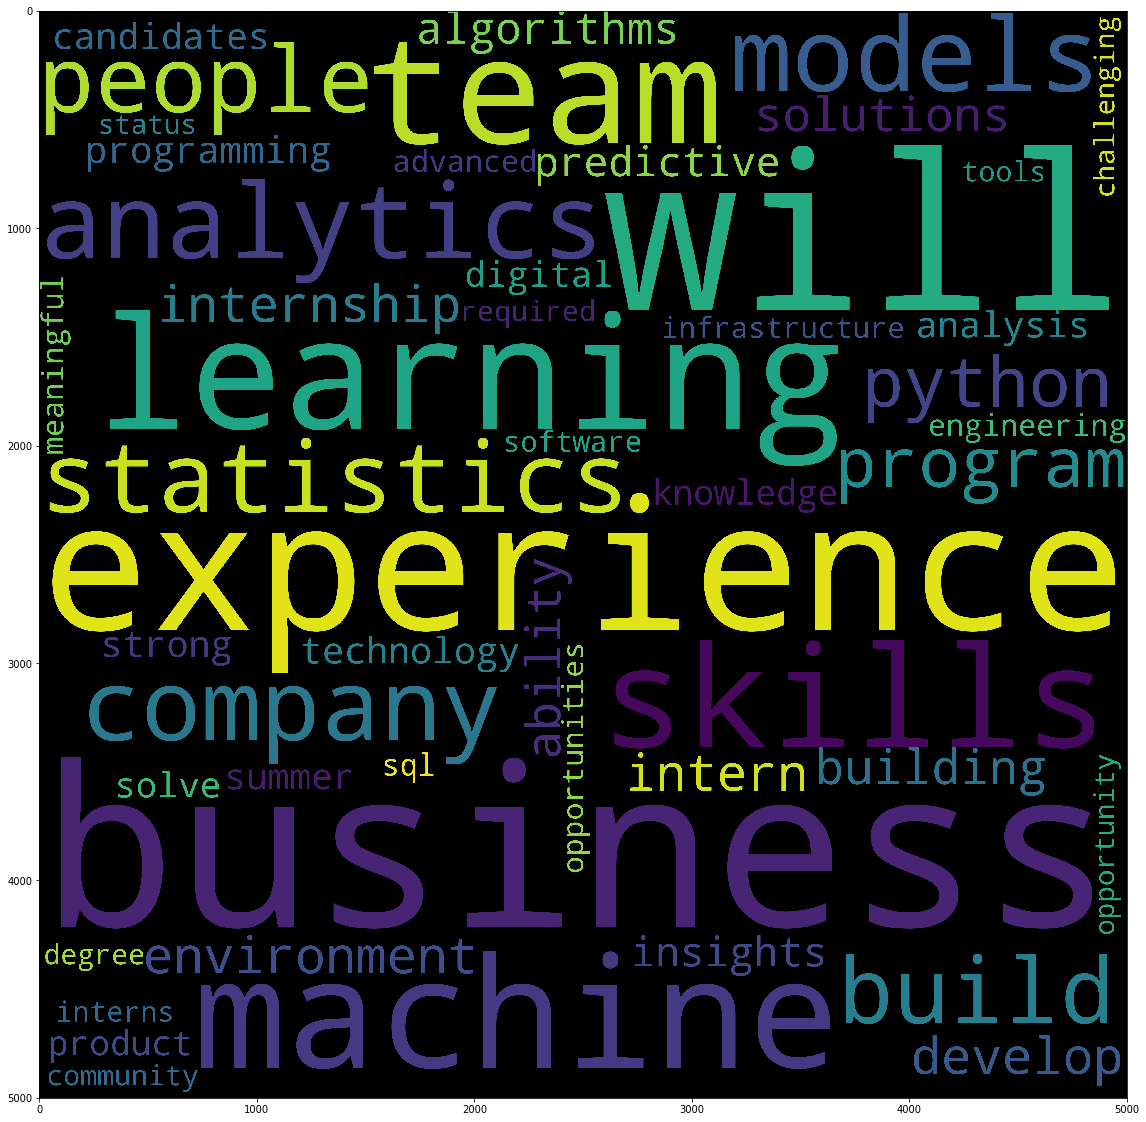

In [815]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black",width=5000,height=5000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(words_freq[:150]))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

No useful results either! :(

In [783]:
long_list_cleaned = long_list.translate(str.maketrans('','',string.punctuation))

# Let's  Spacy! 

Now I will try spacy library to use the matcher objective to match some sort of POS sequence. For example adjective verb noun etc. Let's look at the results

In [557]:
import spacy
nlp = spacy.load('en')

C:\Users\1234567890\Anaconda3\envs\dataci\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\1234567890\Anaconda3\envs\dataci\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
C:\Users\1234567890\Anaconda3\envs\dataci\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\1234567890\Anaconda3\envs\dataci\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [558]:
nynlp = nlp(long_list_cleaned)

In [562]:
from spacy.matcher import Matcher
from spacy import displacy

In [795]:
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized
matched_phrases = [] # just the matched phrases without the sentence

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end] # matched span
    sent = span.sent # sentence containing matched span
    # append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{'start': span.start_char - sent.start_char, 
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents})
    matched_phrases.append(span.text)

### Verb -  Adjective - Noun - Combinations

In [796]:
matcher.add('phrase', collect_sents, [{'POS': 'VERB'}, {'POS': 'ADJ'},{'POS': 'NOUN'} ])

In [797]:
matches = matcher(nynlp)

In [798]:
displacy.render(matched_sents, style='ent', manual=True, jupyter=True)

In [802]:
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized
matched_phrases = [] # just the matched phrases without the sentence
matcher.add('phrase', collect_sents, [  {'POS': 'ADJ'},{'POS': 'NOUN'}, {'POS': 'NOUN'}])
matches = matcher(nynlp)

In [803]:
displacy.render(matched_sents, style='ent', manual=True, jupyter=True)

## Finally using RAKE: 

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

In [716]:
from rake_nltk import Rake

r = Rake(min_length=3, max_length=4) # Uses stopwords for english from NLTK, and all puntuation characters.

r.extract_keywords_from_text(long_list_cleaned)

fea = r.get_ranked_phrases_with_scores() # To get keyword phrases ranked highest to lowest.
fea[0][1]

fea_list = []
for i in range(0, len(fea)):
    fea_list.append(fea[i][1])
    

In [717]:
len(fea_list)

483

In [718]:
fea_list

['washington dc metropolitan area',
 'pythonpandasscikitlearn r matlab tensorflow',
 'public utility industrial residential',
 'programming language andor tool',
 'personal lines commercial claims',
 'monitor daytoday bug detection',
 'ml andor statistical modelingproficient',
 'luxurious fullyfurnished corporate housing',
 'individual procter gamble participates',
 'illegal drug use prior',
 'general matter procter gamble',
 'fuels superior display advertising',
 'detect malicious javascript pages',
 'csuite level decision makers',
 'commercial jetliners defense space',
 'candor welcome home lendinghome',
 'applicable national federal state',
 'accredited university studying toward',
 '22 cfr § 12015',
 'worlds largest aerospace company',
 'even conduct mock interviews',
 'even blended wing body',
 'complex tasks track record',
 'related field strong background',
 'quantitative field strong foundations',
 'curious mind interns generally',
 'cando attitude strong enthusiasm',
 'working

# Limitations & obstacles faced during the project: 

Limitations: 

From the dataframe above we can see there is a lot of noise. When I scraped the data there is a lot useless information about the company. If I coulf write a better scraper that only filtered the description and nothing else it would be more accurate.  Feel free to try this out yourself. 

Obstacles: 

I tried a of lot scripts, my first try was to use seleneium but that didnt work because I was trying to find elements by x_path, every job has its unique x_path except for the first 3 and the last 2. Their x_paths are fixed. So I had to do a lot of stack overflow before I kinda learned how to use beautifulsoup, urllib, & requests packages



# Conclusion: 

This is a good starting point for webscraping & keyword selection. Naturally, I have seen pros build more complex, robust, faster crawlers for scraping. But I am no programming genius. I get by reading stackoverflow and documentation. 

This script can provide learning data scientists with a custom corpus for indeed data descriptions. They can build NLP models for whatever projects they are doing. 

All in all this was a very rewardful project.


Basically there are three phases to this project: 


1. Getting the corpus by webscraping

2. Building the NLP model to extract keywords for the job description

3. Deploying & using the model to polish resumes


I hope you liked it! 

Feel free to shoot me an email if you have any questions or positive criticism regarding the code or how I could have done it better! 

You can also send me an email if you would like to further work on this idea and polish it a little more

Muhammadut@gmail.com

# Future Implications: 

To improve this project, I would like to under NLP concepts a little more in dept so correct keyword extraction is done with high accuracy. 

Let's go and read some more! 


## Thank you for reading! 

I will keep you posted! 